In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
## import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into dependent and independent feature
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
## feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
## concatenate these variable with dataframe
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
#Sliptting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
## Features scaling
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2 now lets create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
 ### Lets initialixe the ANN
 classifier = Sequential()

In [ ]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## Adding the secound hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# OR

# classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
## Early stopping
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=2,
)

In [ ]:
model_histroy = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8173 - loss: 0.4652 - val_accuracy: 0.8557 - val_loss: 0.3726
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8548 - loss: 0.3620 - val_accuracy: 0.8519 - val_loss: 0.3693
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8496 - loss: 0.3723 - val_accuracy: 0.8542 - val_loss: 0.3695
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8520 - loss: 0.3709 - val_accuracy: 0.8519 - val_loss: 0.3731
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8427 - loss: 0.3740 - val_accuracy: 0.8569 - val_loss: 0.3640
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8619 - loss: 0.3560 - val_accuracy: 0.8580 - val_loss: 0.3643
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8493 - loss: 0.3678 - val_accuracy: 0.8550 - val_loss: 0.3658
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8599 - loss: 0.3545 -

In [ ]:
 model_histroy.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

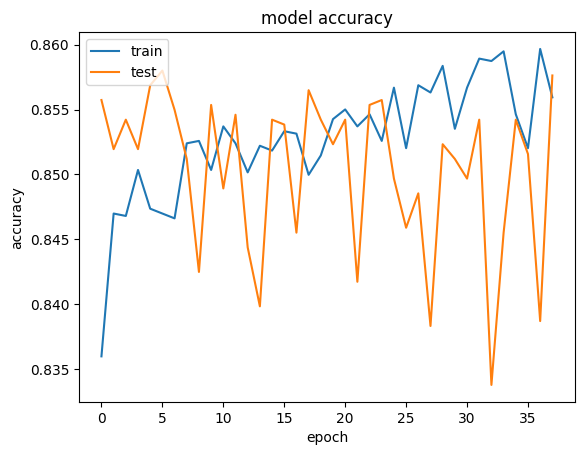

In [ ]:
# summarize the history for accuracy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

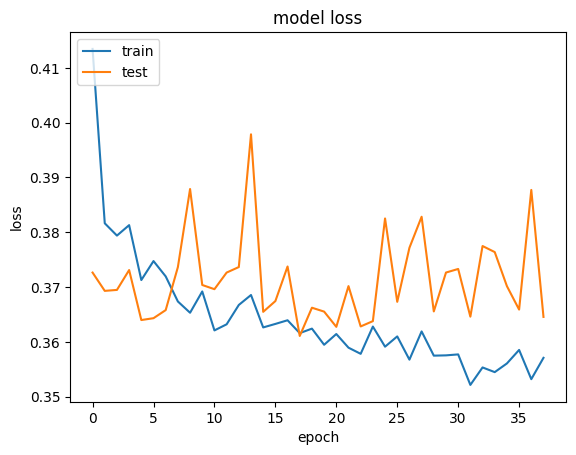

In [ ]:
# summarize history for loss
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# part -3 Making the prediction and evaluating the model

#predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
## make the confusion martix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1515,   80],
       [ 209,  196]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8555

In [ ]:
## Get the weights
classifier.get_weights()

[array([[ 0.5424155 ,  3.1627805 ,  0.01161034,  1.2945263 ,  0.1368532 ,
          1.675454  ,  0.42269808, -0.0627104 , -0.8686542 ,  1.128208  ,
         -0.5588679 ],
        [-0.95977247, -0.8247546 ,  0.65666705, -1.5054871 ,  3.8739543 ,
         -0.701294  , -2.51577   ,  3.6445692 , -2.415097  , -0.45663017,
          0.26390535],
        [-0.3132437 , -0.3643215 , -0.13058427,  1.0867153 ,  0.01500061,
         -0.73986125,  0.23173131,  0.4148181 , -1.2519633 ,  0.18289119,
          0.29120135],
        [-3.8943222 , -2.0551696 ,  1.2080456 ,  2.8699222 , -1.6221331 ,
         -2.1132288 , -0.2203913 ,  0.24523535, -0.02004624,  0.15912633,
          1.6341205 ],
        [ 1.5650492 ,  1.7356286 ,  5.2454295 ,  1.9834907 , -2.7404623 ,
         -0.23612094,  1.6752712 ,  1.6065024 ,  1.8029279 ,  1.5265596 ,
          1.4304625 ],
        [-1.8277566 ,  1.6949651 , -0.13876623,  0.37035665, -0.31879988,
         -0.7232982 , -0.6142831 , -0.09235937,  0.9293268 , -0.1658063